In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-06-16 12:19:19 +05:30)


In [3]:
!pip install bing-image-downloader

time: 3.94 s (started: 2021-06-16 12:19:19 +05:30)


In [4]:
!mkdir images

time: 15 ms (started: 2021-06-16 12:19:23 +05:30)


A subdirectory or file images already exists.


In [5]:
from bing_image_downloader import downloader
downloader.download("Basket Ball" , limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to C:\Users\D Deepak Prasanna\Desktop\New folder\images\Basket Ball


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://cdn.shopify.com/s/files/1/0016/9266/3857/products/PHOTO-2019-04-12-05-23-54_1024x1024@2x.jpg?v=1558654268
[%] File Downloaded !

[%] Downloading Image #2 from https://theballstore.co.nz/wp-content/uploads/2020/04/BB700-TRUE-Side-1.png
[%] File Downloaded !

[%] Downloading Image #3 from https://cdn.shopify.com/s/files/1/0016/9266/3857/products/PHOTO-2019-04-12-05-23-53_1024x1024@2x.jpg?v=1558654268
[%] File Downloaded !

[%] Downloading Image #4 from https://mg.co.id/wp-content/uploads/2020/03/true_grip_ot_8p_07-600x600.png
[%] File Downloaded !

[%] Downloading Image #5 from https://cdn.shopify.com/s/files/1/0016/9266/3857/products/PHOTO-2019-04-12-05-23-52_1024x1024@2x.jpg?v=1558654268
[%] File Downloaded !

[%] Downloading Image #6 from https://mg.co.id/product/nike-basket-ball-true-grip-ot-8p-07/t

In [6]:
from bing_image_downloader import downloader
downloader.download("Rugby Ball" , limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to C:\Users\D Deepak Prasanna\Desktop\New folder\images\Rugby Ball


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://www.rugbystore.co.uk/wso/images/library/48427805-side1-72dpi-rgb.jpg?view=976&amp;v=637153728600000000
[%] File Downloaded !

[%] Downloading Image #2 from https://www.rugbystore.co.uk/wso/images/library/gow-017378-front-72dpi-rgb.jpg?view=976&amp;v=636547382400000000
[%] File Downloaded !

[%] Downloading Image #3 from https://www.cathryncariad.com/uploads/5/0/7/9/5079686/s330083002289802700_p249_i34_w2466.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rugbystore.co.uk/wso/images/library/45075905-detail-72dpi-rgb.jpg?view=976&amp;v=636461638200000000
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/97/af/d2/97afd2912fcdbed61e7d2dde52a9a2bf.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.rugbystore.co.uk/wso/images/library/4

In [2]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = r'C:\Users\D Deepak Prasanna\Desktop\New folder\images'
CATEGORIES = ['Basket Ball','Rugby Ball']

for category in CATEGORIES:
    class_num  = CATEGORIES.index(category) #Label encoding the values
    path = os.path.join(DATADIR,category)  #Create path to use all the images
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        #print(img_array.shape)
        #plt.imshow(img_array)
        img_resized = resize(img_array,(150,150,3))
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [3]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
unique,count = np.unique(target,return_counts=True)

<BarContainer object of 2 artists>

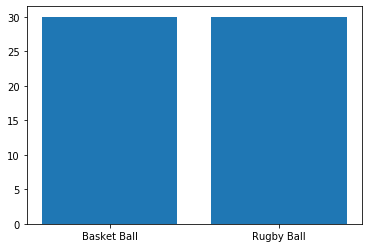

In [5]:
plt.bar(CATEGORIES,count)

In [6]:
#Split data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)

# Train the model using the training sets
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [8]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [9]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
accuracy_score(y_pred,y_test)

1.0

In [12]:
confusion_matrix(y_pred,y_test)

array([[11,  0],
       [ 0,  7]], dtype=int64)

In [13]:
#Save the model using pickle
import pickle
pickle.dump(classifier,open('img_model.p','wb'))

In [14]:
model = pickle.load(open('img_model.p','rb'))

Enter the urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRtiMk0SkLN27YRblS4KdeMkY2j1khHWZ8BBA&usqp=CAU
(225, 225, 3)
 Predicted output: Basket Ball


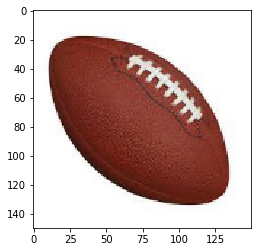

In [20]:
#Testing a brand new image

flat_data = []
url = input("Enter the url")
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' Predicted output: {y_out}')


In [71]:
!pip install streamlit
!pip install ngrok
from pyngrok import ngrok

time: 12.5 s (started: 2021-06-16 13:32:46 +05:30)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\D Deepak Prasanna\Anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\DDEEPA~1\\AppData\\Local\\Temp\\pip-install-4jknomi4\\ping\\setup.py'"'"'; __file__='"'"'C:\\Users\\DDEEPA~1\\AppData\\Local\\Temp\\pip-install-4jknomi4\\ping\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base pip-egg-info
         cwd: C:\Users\DDEEPA~1\AppData\Local\Temp\pip-install-4jknomi4\ping\
    Complete output (8 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "C:\Users\DDEEPA~1\AppData\Local\Temp\pip-install-4jknomi4\ping\setup.py", line 23, in <module>
        from ping import __version__
      File "C:\Users\DDEEPA~1\AppData\Local\Temp\pip-install-4jknomi4\ping\ping.py", line 196
        except socke

In [23]:
%%writefile app.py
import streamlit as st
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title("immage classifier")
st.text("Upload the image")

model = pickle.load(open('img_model.p','rb'))

Uploaded_file = st.file_uploader("Choose an image....",type="jpg")
if Uploaded_file is not None:
    img = Image.open(Uploaded_file)
    st.image(img,caption='Uploaded Image')
    
    if st.button("PREDICT"):
        CATEGORIES = ['Basket Ball','Rugby Ball']
        st.write('Result....')
        flat_data=[]
        img = np.array(img)
        img_resized = resize(img,(150,150,3))
        flat_data.append(img_resized.flatten())
        flat_data = np.array(flat_data)
        y_out = model.predict(flat_data)
        y_out = CATEGORIES[y_out[0]]
        st.write(f'PREDICTED OUTPUT: {y_out}')
        q = model.predict_proba(flat_data)
        for index, item in enumerate(CATEGORIES):
            st.write(f'{item} : {q[0][index]*100}%')
            

Overwriting app.py
